In [58]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

REAL DATA

In [ ]:
data = pd.read_csv('./Life_Expectancy_Data.csv',index_col=0)
#data.describe()

In [ ]:
data.head()

In [ ]:
subset=data[['Year','Status','Life expectancy ']]
df_2014_dev=subset.loc[(subset.Year==2014) & (subset.Status=='Developing')]

min__all_values_2014=subset['Life expectancy '].min()
max__all_values_2014=subset['Life expectancy '].max()

life_exp_norm_2014= (df_2014_dev['Life expectancy '] - min__all_values_2014 )/(max__all_values_2014-min__all_values_2014)
df_2014_dev.insert(loc=3,column='Life_exp_norm',value=life_exp_norm_2014)
df_2014_dev

In [62]:
subset=data[['Year','Status','Life expectancy ']]
df_2015_dev=subset.loc[(subset.Year==2015) & (subset.Status=='Developing')]

min__all_values_2015=subset['Life expectancy '].min()
max__all_values_2015=subset['Life expectancy '].max()

life_exp_norm_2015= (df_2015_dev['Life expectancy '] - min__all_values_2015 )/(max__all_values_2015-min__all_values_2015)
df_2015_dev.insert(loc=3,column='Life_exp_norm',value=life_exp_norm_2015)
df_2015_dev

,Year,Status,Life expectancy,Life_exp_norm
Country,,,,
Afghanistan,2015,Developing,65.0,0.544592
Albania,2015,Developing,77.8,0.787476
Algeria,2015,Developing,75.6,0.745731
Angola,2015,Developing,52.4,0.305503
Antigua and Barbuda,2015,Developing,76.4,0.760911
...,...,...,...,...
Venezuela (Bolivarian Republic of),2015,Developing,74.1,0.717268
Viet Nam,2015,Developing,76.0,0.753321
Yemen,2015,Developing,65.7,0.557875


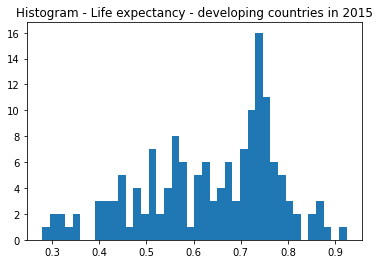

In [63]:
plt.hist(life_exp_norm_2015,bins=40)
plt.title("Histogram - Life expectancy - developing countries in 2015")
plt.show()

MODEL 1 - Normal distirbution

In [ ]:
model_ppc=CmdStanModel(stan_file='2015_dev_ppc_1.stan')

R = 1000
sim_1=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)


plt.hist(sim_1.stan_variable('life_exp'), bins=80, label= "life_exp", histtype='step')
plt.legend(loc="upper left")
plt.title("(model 1)Histogram - prior - Life expectancy - normal distribution")
plt.show()

In [65]:
data_to_fit=dict(N=len(life_exp_norm_2015),life_exps=life_exp_norm_2015)

model_1_fit=CmdStanModel(stan_file='2015_dev_fit_1.stan')
fit_model_1=model_1_fit.sample(data=data_to_fit,seed=28052020)
fit_model_1.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,220.00,0.02700,1.000,220.00,220.00,220.00,1500.00,880.0,1.0
mu,0.63,0.00021,0.012,0.62,0.63,0.65,3000.00,1700.0,1.0
sigma,0.14,0.00015,0.008,0.13,0.14,0.16,3000.00,1800.0,1.0
log_lik[1],0.82,0.00140,0.083,0.72,0.83,0.92,3434.00,1991.0,1.0
log_lik[2],0.44,0.00160,0.092,0.29,0.44,0.58,3180.00,1843.0,1.0
...,...,...,...,...,...,...,...,...,...
life_exp_generated[148],0.63,0.00250,0.150,0.39,0.63,0.87,3632.00,2105.0,1.0
life_exp_generated[149],0.63,0.00240,0.150,0.39,0.63,0.87,3889.00,2255.0,1.0
life_exp_generated[150],0.63,0.00240,0.150,0.39,0.64,0.88,4127.00,2392.0,1.0


In [ ]:
plt.hist(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80, label= "life_exp", histtype='step')
plt.legend(loc="upper left")
plt.title("(model 1)Histogram - post prediction - Life expectancy - normal distribution")
plt.show()

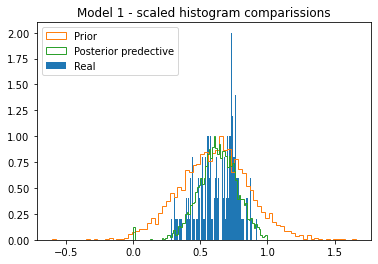

In [67]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_2, bins_2) = np.histogram(sim_1.stan_variable('life_exp'), bins=80)
(counts_3, bins_3) = np.histogram(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_2[:-1], bins_2, weights=(1/(max(counts_2)))*counts_2, histtype='step')
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

#plt.hist(life_exp_norm_2015,bins=80, histtype='step')
#plt.hist(sim.stan_variable('life_exp'), bins=80, histtype='step')
#plt.hist(fit_model_1.stan_variable('life_exp_generated'), bins=80, histtype='step')

plt.legend(labels=["Prior","Posterior predective","Real"],loc="upper left")
plt.title("Model 1 - scaled histogram comparissions")
plt.show()

In [68]:

#plt.hist(life_exp_norm_2015,bins=80, histtype='step')
#plt.hist(sim_1.stan_variable('life_exp'), bins=80, histtype='step')
#plt.hist(fit_model_1.stan_variable('life_exp_generated'), bins=80, histtype='step')

MODEL 2 - GAMMA Distirbution

In [ ]:
model_ppc_2=CmdStanModel(stan_file='2015_dev_ppc_2.stan')

R = 4000
sim_2=model_ppc_2.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=4,
                     fixed_param=True,
                     seed=29042020,refresh=R)


plt.hist(sim_2.stan_variable('life_exp'), bins=160, label= "life_exp", histtype='step')
plt.legend(loc="upper left")
plt.title("(model 2)Histogram - prior - Life expectancy - gamma distribution")
plt.show()

In [70]:
data_to_fit=dict(N=len(life_exp_norm_2015),life_exps=life_exp_norm_2015)

model_2_fit=CmdStanModel(stan_file='2015_dev_fit_2.stan')
fit_model_2=model_2_fit.sample(data=data_to_fit,seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [71]:
fit_model_2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,64.000,0.02800,0.9600,62.000,64.000,65.000,1200.00,510.00,1.0
alpha,13.000,0.04200,1.2000,11.000,13.000,15.000,750.00,330.00,1.0
beta,0.048,0.00016,0.0043,0.041,0.048,0.055,730.00,320.00,1.0
log_lik[1],0.820,0.00160,0.0520,0.740,0.830,0.910,1029.00,446.00,1.0
log_lik[2],0.270,0.00120,0.0730,0.140,0.270,0.390,3676.00,1593.00,1.0
...,...,...,...,...,...,...,...,...,...
life_exp_generated[148],0.630,0.00290,0.1800,0.380,0.620,0.950,3927.00,1702.00,1.0
life_exp_generated[149],0.630,0.00290,0.1700,0.370,0.610,0.940,3645.00,1580.00,1.0
life_exp_generated[150],0.630,0.00280,0.1800,0.370,0.620,0.950,4016.00,1741.00,1.0


In [ ]:
median_generated_model_2=np.percentile(fit_model_2.stan_variable('life_exp_generated')[:,:],50,axis=0)

plt.hist(fit_model_2.stan_variable('life_exp_generated_v2'), bins=80, label= "life_exp", histtype='step')
plt.legend(loc="upper left")
plt.title("(model 2)Histogram - post prediction - Life expectancy - normal distribution")
plt.show()

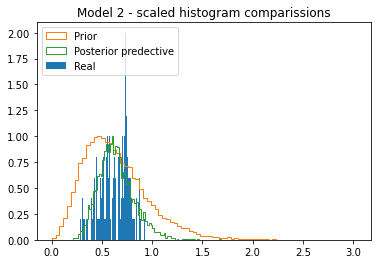

In [73]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_2, bins_2) = np.histogram(sim_2.stan_variable('life_exp'), bins=80)
(counts_3, bins_3) = np.histogram(fit_model_2.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_2[:-1], bins_2, weights=(1/(max(counts_2)))*counts_2, histtype='step')
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

#plt.hist(life_exp_norm_2015,bins=80, histtype='step')
#plt.hist(sim.stan_variable('life_exp'), bins=80, histtype='step')
#plt.hist(fit_model_1.stan_variable('life_exp_generated'), bins=80, histtype='step')

plt.legend(labels=["Prior","Posterior predective","Real"],loc="upper left")
plt.title("Model 2 - scaled histogram comparissions")
plt.show()

COMPARISSON - WAIC and LOO

c:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

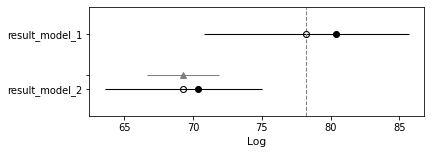

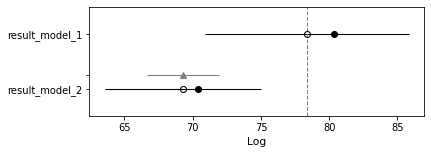

In [74]:
results = {'result_model_1': fit_model_1,'result_model_2': fit_model_2}
comparisson_waic_1 = az.compare(results, ic = 'waic')
az.plot_compare(comparisson_waic_1)
comparisson_loo_1 = az.compare(results, ic = 'loo')
az.plot_compare(comparisson_loo_1)

In [77]:
comparisson_waic_1

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
result_model_1,0,78.245564,2.120469,0.000000,1.000000e+00,7.464507,0.000000,False,log
result_model_2,1,69.275177,1.089976,8.970386,1.474376e-13,5.717428,2.622727,False,log


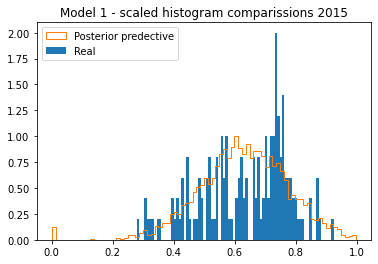

In [75]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2015, bins=80)
(counts_3, bins_3) = np.histogram(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

#plt.hist(life_exp_norm_2015,bins=80, histtype='step')
#plt.hist(sim.stan_variable('life_exp'), bins=80, histtype='step')
#plt.hist(fit_model_1.stan_variable('life_exp_generated'), bins=80, histtype='step')

plt.legend(labels=["Posterior predective","Real"],loc="upper left")
plt.title("Model 1 - scaled histogram comparissions 2015")
plt.show()


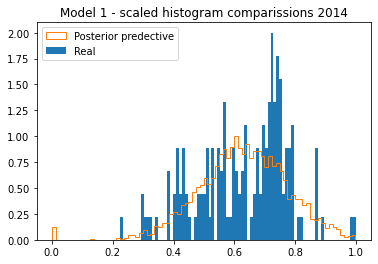

In [76]:
(counts_1, bins_1) = np.histogram(life_exp_norm_2014, bins=80)
(counts_3, bins_3) = np.histogram(fit_model_1.stan_variable('life_exp_generated_v2'), bins=80)

plt.hist(bins_1[:-1], bins_1, weights=(2/(max(counts_1)))*counts_1)
plt.hist(bins_3[:-1], bins_3, weights=(1/(max(counts_3)))*counts_3, histtype='step')

#plt.hist(life_exp_norm_2015,bins=80, histtype='step')
#plt.hist(sim.stan_variable('life_exp'), bins=80, histtype='step')
#plt.hist(fit_model_1.stan_variable('life_exp_generated'), bins=80, histtype='step')

plt.legend(labels=["Posterior predective","Real"],loc="upper left")
plt.title("Model 1 - scaled histogram comparissions 2014")
plt.show()